<a href="https://colab.research.google.com/github/DiogoReze/FFT-Estudo/blob/main/FFT_Estudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
#https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html
#https://www.earthinversion.com/geophysics/computing-cross-correlation-between-seismograms/#compute-the-cross-correlation-in-time-domain
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

plt.style.use('seaborn-poster')
%matplotlib inline

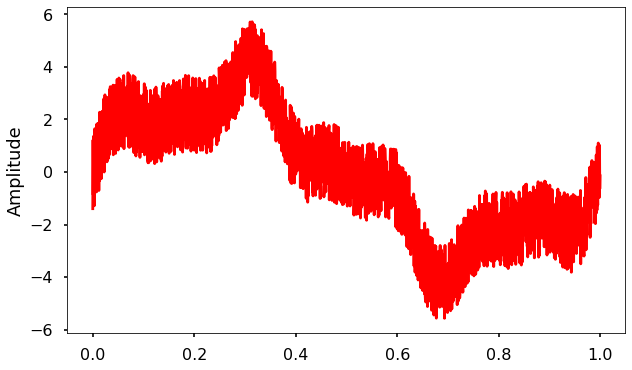

In [75]:
# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

aux = x.copy()

random.seed(8)
noise = np.random.uniform(-1.5, 1.5, (sr))
x += noise 

plt.figure(figsize = (10, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


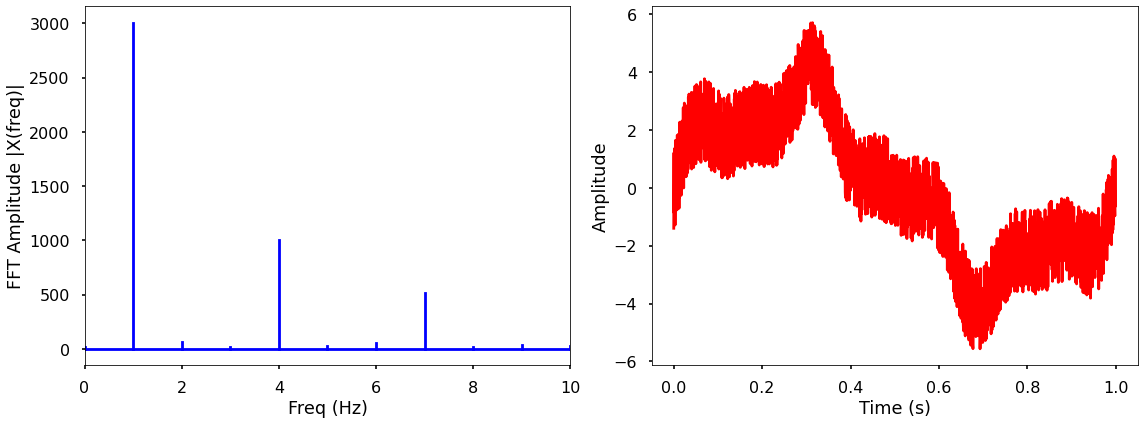

In [76]:
from numpy.fft import fft, ifft, fftshift

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (16, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


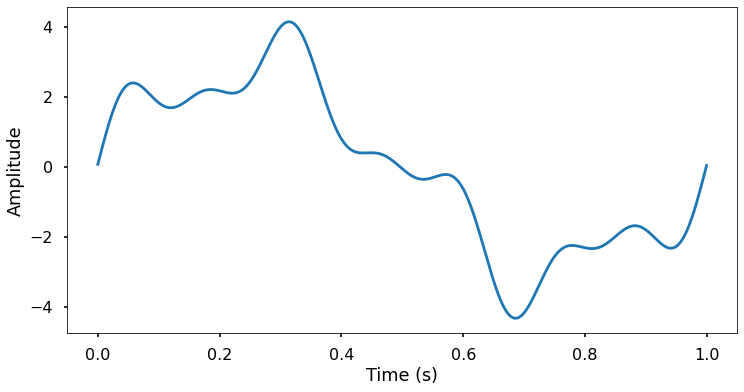

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


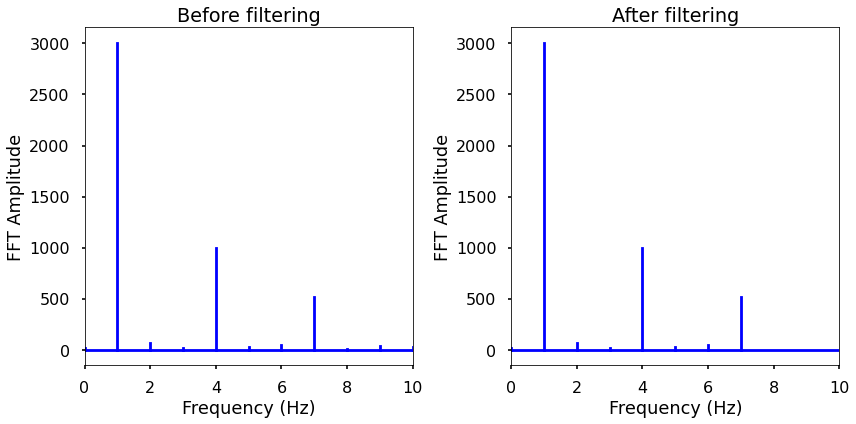

In [77]:
from scipy.fftpack import fftfreq

# FFT the signal
sig_fft = fft(x)
# copy the FFT results
sig_fft_filtered = sig_fft.copy()

# obtain the frequencies using scipy function
freq = fftfreq(len(x), d=1./2000)

# define the cut-off frequency
cut_off = 7

# high-pass filter by assign zeros to the 
# FFT amplitudes where the absolute 
# frequencies smaller than the cut-off 
sig_fft_filtered[np.abs(freq) > cut_off] = 0

# get the filtered signal in time domain
filtered = ifft(sig_fft_filtered)

# plot the filtered signal
plt.figure(figsize = (12, 6))
plt.plot(t, filtered)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# plot the FFT amplitude before and after
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(sig_fft), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('Before filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.subplot(122)
plt.stem(freq, np.abs(sig_fft_filtered), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('After filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.tight_layout()
plt.show()

In [78]:
#https://www.earthinversion.com/geophysics/computing-cross-correlation-between-seismograms/#compute-the-cross-correlation-in-time-domain
def cross_correlation_using_fft(x, y):
    f1 = fft(x)
    f2 = fft(np.flipud(y))
    cc = np.real(ifft(f1 * f2))
    return fftshift(cc)

def compute_shift(x, y):
    assert len(x) == len(y)
    c = cross_correlation_using_fft(x, y)
    assert len(c) == len(x)
    zero_index = int(len(x) / 2) - 1
    shift = zero_index - np.argmax(c)
    return shift

shift = compute_shift(x,filtered)

print(shift)
print(cross_correlation_using_fft(x, filtered))

0
[-8295.68185209 -8295.59366565 -8295.44675122 ... -8295.59366565
 -8295.68185209 -8295.71125387]


In [79]:
#https://www.investopedia.com/terms/c/crosscorrelation.asp

signalCrossTemp = np.correlate(x,filtered)

signalCrossFreq = np.correlate(fft(aux),fft(x),mode='same')
print(signalCrossFreq)

[-12622.78739791 +84632.47546689j   -585.1606505 -301364.34237035j
 -43936.600929  +148734.43653312j ... 236721.55023207-141319.25581417j
 -43936.600929  -148734.43653312j   -585.1606505 +301364.34237035j]


aplicar os 6 metodos deste artigo:

https://tech.gorilla.co/how-can-we-quantify-similarity-between-time-series-ed1d0b633ca0

https://j363j.medium.com/comparison-of-times-series-clustering-via-dynamic-time-warping-euclidean-distance-and-global-97262c3f369a

com isso teremos 6 métodos de validação de que uma funcao é parecida com a outra (funcao que ja temos conhecimento que é do tipo pronada, neutra ou supinada), e assim conseguiremos aplicar os 6 metodos na funcao real com a funcao modelada, identificando o tipo de pisada.
Dentre eles, temos o correlacao pelo metodo de pearson, que retorna coeficientes do polinomio obtido da correlacao por fourier, das duas series temporais (funcoes)

In [80]:
def calc_euclidean(actual, predic):
    return np.sqrt(np.sum((actual - predic) ** 2))

print(calc_euclidean(np.abs(x), np.abs(filtered)))

37.156461992701594


In [81]:
def calc_mape(actual, predic):
    return np.mean(np.abs((actual - predic) / actual))

print(calc_euclidean(np.abs(x), np.abs(filtered)))

37.156461992701594


In [83]:
def calc_correlation(actual, predic):
    a_diff = actual - np.mean(actual)
    p_diff = predic - np.mean(predic)
    numerator = np.sum(a_diff * p_diff)
    denominator = np.sqrt(np.sum(a_diff ** 2)) * np.sqrt(np.sum(p_diff ** 2))
    return numerator / denominator

print(calc_euclidean(np.abs(x), np.abs(filtered)))

37.156461992701594


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


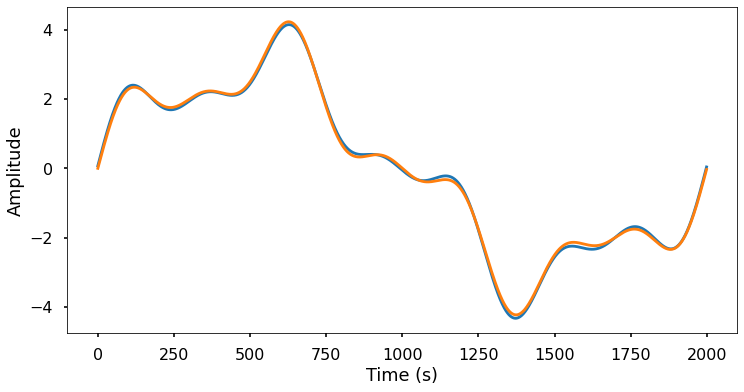

In [82]:
plt.figure(figsize = (12, 6))
plt.plot(filtered)
plt.plot(aux)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()